### Prim's algo to find max possible speed to not break speed limit

In [1]:
import networkx as nx, matplotlib.pyplot as plt, numpy as np

Undirected Graph:


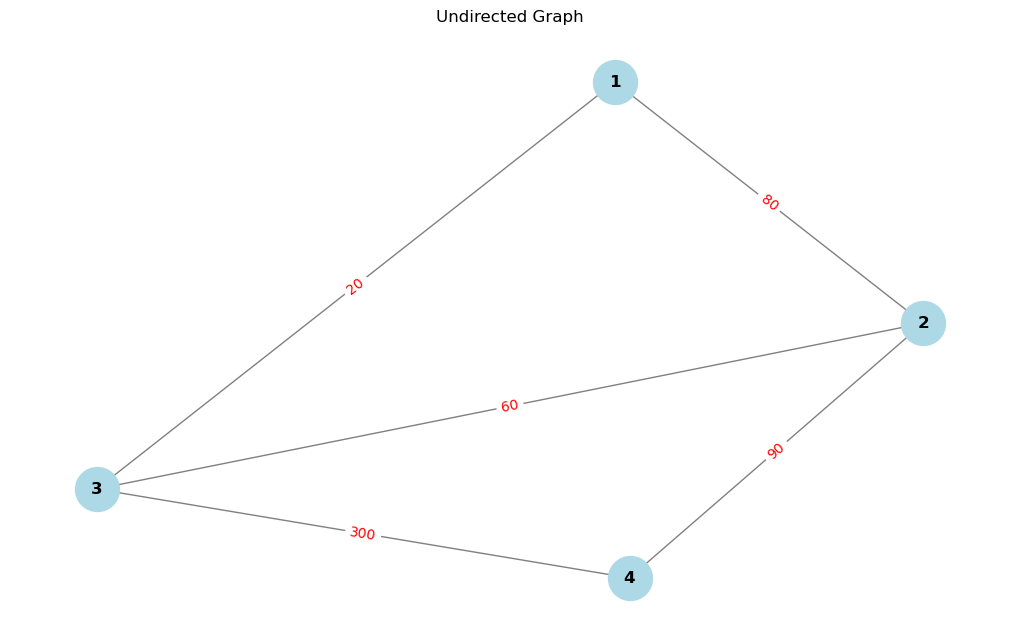

In [3]:
# Define the graph edges with weights (for demonstration purposes)
edges = [
    (1, 2, 80),
    (4, 3, 300),
    (3, 1, 20),
    (2, 4, 90),
    (2, 3, 60)
]

def draw_graph(edges, directed=False):
    # Create a directed or undirected graph based on the 'directed' flag
    G = nx.DiGraph() if directed else nx.Graph()
    
    # Add weighted edges to the graph
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)
        
    # Get positions for all nodes using a layout
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

    # Draw nodes and edges
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color='gray')
    
    # Draw edge labels to display weights
    edge_labels = {(u, v): f'{w}' for u, v, w in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    title = "Directed Graph" if directed else "Undirected Graph"
    plt.title(title)
    plt.show()

# Draw undirected graph
print("Undirected Graph:")
draw_graph(edges, directed=False)


In [4]:
def find_max_speed(N, edges):
    # create adjacency matrix
    graph = [[0]*N for _ in range(N)]
    for u,v, weight in edges:
        u,v = u-1, v-1
        graph[u][v] = weight
        graph[v][u] = weight # undirected graph symmetric matrix
        
    # prim's algo
    visited = [False]*N
    # max_speeds = [float('-inf')]*N
    max_speeds = [0]*N
    max_speeds[0] = float('inf')
    
    # find path with maximum possible speed
    for _ in range(N):
        # find unvisited vertx with maximum speed
        curr_vertex = -1
        curr_max = float('inf')
        
        for v in range(N):
            if not visited[v] and max_speeds[v]> curr_max:
                curr_vertex = v
                curr_max = max_speeds[v]
                
        if curr_vertex == -1:
            break
        
        visited[curr_vertex] = True
        
        # update max speeds through current vertex
        for next_vertex in range(N):
            if(graph[curr_vertex][next_vertex] > 0 and not visited[next_vertex]):
                # maximum possible speed is minimum of current path and new road
                new_speed = min(max_speeds[curr_vertex],graph[curr_vertex][next_vertex])
                max_speeds[next_vertex] = max(max_speeds[next_vertex], new_speed)
                
    return max_speeds[N-1]

In [5]:
# Test
N= 4
M= 5
edges = [[1,2,80],[4,3,300],[3,1,20],[2,4,90],[2,3,60]]

print(find_max_speed(N, edges))

0
